# Introduction to neural networks
In this notebook we will start with the basics of neural networks for tasks such as regression and classification.

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano, as well as other frameworks. It was developed with a focus on enabling fast experimentation.



## Exercise 1 (Regression)

The first talk we are going to solve using neural networks is Regression. This is a supervised machine learning task, where the goal is to approximate an underlying function based on data observations. For this exercise the underlying function will be 
$$ f: \mathbb{R} \rightarrow \mathbb{R}$$
$$ f(x) = 10\sin(\pi x^2) + 20 (x-0.5)^ 2 + 15 *x$$

**a)** Construct a dataset by first generating $500$ uniformly distributed $x_i$-samples and then computing $y_i = f(x_i) + 5\eta_i$ where $\eta_i \sim \mathcal{N}(0,1)$. Create a plot with the data-points and the underlying function.


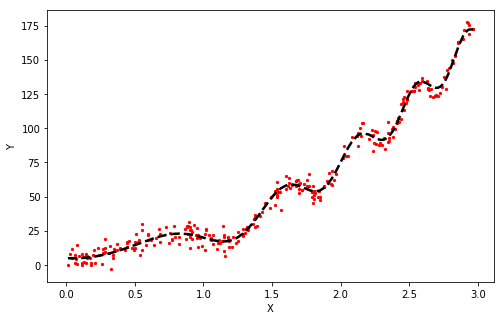

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

X = np.sort(np.random.uniform(0, 3, 300))
Y_true = 10 * np.sin(np.pi * X * X) + 20 * (X - 0.5) ** 2 + 15 * X 
Y = Y_true + np.random.normal(size=X.shape) * 5

plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='red', s=5)
plt.plot(X, Y_true, color='black', linestyle='--', linewidth=2.5)

plt.xlabel('X')
plt.ylabel('Y');

**b)** Split the data set into **training**, and **validation** sets and scale the values for achieving faster convergence. Plot the training points and the testing points with different colors.

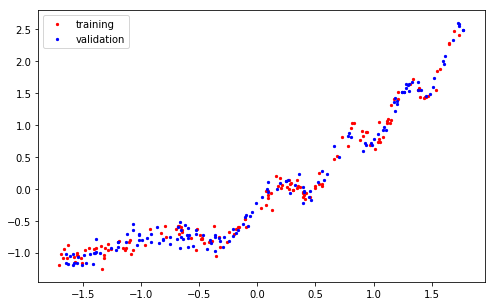

In [2]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

X = scale(X)
Y = scale(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

plt.figure(figsize=(8,5))
plt.scatter(X_train, Y_train, color='red', s=5, label='training')
plt.scatter(X_test, Y_test, color='blue', s=5, label='validation')
plt.legend()

**c)** Create a feed-forward neural network with one hidden layer. Train the network using the training set. Play around with the number of neurons and the number of layers to give more o less complexity to the model.

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam


model = Sequential()

hidden1 = Dense(10, input_dim=1, activation='tanh')
hidden2 = Dense(5, activation='tanh')
output = Dense(1, activation='linear')

model.add(hidden1)   
model.add(hidden2)   
model.add(output)

model.compile(optimizer=adam(0.01), loss='mse')

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [4]:
h = model.fit(X_train, Y_train, epochs=5000, verbose=1, validation_data=(X_test, Y_test), batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 150 samples, validate on 150 samples
Epoch 1/5000
150/150 [==============================] - 0s 3ms/step - loss: 2.2133 - val_loss: 1.6177
Epoch 2/5000
150/150 [==============================] - 0s 100us/step - loss: 0.9431 - val_loss: 0.5719
Epoch 3/5000
150/150 [==============================] - 0s 87us/step - loss: 0.2933 - val_loss: 0.1743
Epoch 4/5000
150/150 [==============================] - 0s 140us/step - loss: 0.1289 - val_loss: 0.1694
Epoch 5/5000
150/150 [==============================] - 0s 73us/step - loss: 0.1728 - val_loss: 0.1967
Epoch 6/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1751 - val_loss: 0.1644
Epoch 7/5000
150/150 [==============================] - 0s 80us/step - loss: 0.1238 - val_loss: 0.1238
Epoch 8/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0856 - val_loss: 0.1144
Epoch 9/5000
150/150 [==============================] - 0s 67us/step - loss: 0.07

150/150 [==============================] - 0s 113us/step - loss: 0.0305 - val_loss: 0.0337
Epoch 77/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0308 - val_loss: 0.0321
Epoch 78/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0303 - val_loss: 0.0332
Epoch 79/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0303 - val_loss: 0.0327
Epoch 80/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0316 - val_loss: 0.0317
Epoch 81/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0302 - val_loss: 0.0351
Epoch 82/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0307 - val_loss: 0.0333
Epoch 83/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0299 - val_loss: 0.0319
Epoch 84/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0303 - val_loss: 0.0317
Epoch 85/5000
150/150 [==============================] - 0s 113us/step - l

150/150 [==============================] - 0s 87us/step - loss: 0.0293 - val_loss: 0.0323
Epoch 154/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0298 - val_loss: 0.0294
Epoch 155/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0287 - val_loss: 0.0314
Epoch 156/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0292 - val_loss: 0.0314
Epoch 157/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0290 - val_loss: 0.0305
Epoch 158/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0291 - val_loss: 0.0294
Epoch 159/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0288 - val_loss: 0.0308
Epoch 160/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0287 - val_loss: 0.0308
Epoch 161/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0288 - val_loss: 0.0303
Epoch 162/5000
150/150 [==============================] - 0s 93us/s

150/150 [==============================] - 0s 87us/step - loss: 0.0285 - val_loss: 0.0294
Epoch 231/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0291 - val_loss: 0.0299
Epoch 232/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0293 - val_loss: 0.0283
Epoch 233/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0284 - val_loss: 0.0292
Epoch 234/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0287 - val_loss: 0.0293
Epoch 235/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0290 - val_loss: 0.0282
Epoch 236/5000
150/150 [==============================] - 0s 193us/step - loss: 0.0281 - val_loss: 0.0293
Epoch 237/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0293 - val_loss: 0.0293
Epoch 238/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0280 - val_loss: 0.0292
Epoch 239/5000
150/150 [==============================] - 0s 107us/

Epoch 308/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0297 - val_loss: 0.0308
Epoch 309/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0280 - val_loss: 0.0281
Epoch 310/5000
150/150 [==============================] - 0s 386us/step - loss: 0.0296 - val_loss: 0.0292
Epoch 311/5000
150/150 [==============================] - 0s 227us/step - loss: 0.0280 - val_loss: 0.0280
Epoch 312/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0281 - val_loss: 0.0296
Epoch 313/5000
150/150 [==============================] - 0s 280us/step - loss: 0.0277 - val_loss: 0.0285
Epoch 314/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0281 - val_loss: 0.0284
Epoch 315/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0281 - val_loss: 0.0281
Epoch 316/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0279 - val_loss: 0.0295
Epoch 317/5000
150/150 [========================

150/150 [==============================] - 0s 80us/step - loss: 0.0292 - val_loss: 0.0285
Epoch 386/5000
150/150 [==============================] - ETA: 0s - loss: 0.029 - 0s 87us/step - loss: 0.0275 - val_loss: 0.0276
Epoch 387/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0282 - val_loss: 0.0283
Epoch 388/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0283 - val_loss: 0.0274
Epoch 389/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0277 - val_loss: 0.0298
Epoch 390/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0279 - val_loss: 0.0281
Epoch 391/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0282 - val_loss: 0.0293
Epoch 392/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0276 - val_loss: 0.0280
Epoch 393/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0277 - val_loss: 0.0277
Epoch 394/5000
150/150 [=====================

150/150 [==============================] - 0s 80us/step - loss: 0.0291 - val_loss: 0.0275
Epoch 463/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0280 - val_loss: 0.0287
Epoch 464/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0299 - val_loss: 0.0274
Epoch 465/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0284 - val_loss: 0.0298
Epoch 466/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0302 - val_loss: 0.0276
Epoch 467/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0303 - val_loss: 0.0319
Epoch 468/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0279 - val_loss: 0.0280
Epoch 469/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0287 - val_loss: 0.0287
Epoch 470/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0284 - val_loss: 0.0291
Epoch 471/5000
150/150 [==============================] - 0s 113us/st

Epoch 540/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0284 - val_loss: 0.0268
Epoch 541/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0284 - val_loss: 0.0292
Epoch 542/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0278 - val_loss: 0.0275
Epoch 543/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0271 - val_loss: 0.0275
Epoch 544/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0270 - val_loss: 0.0282
Epoch 545/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0285 - val_loss: 0.0278
Epoch 546/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0288 - val_loss: 0.0267
Epoch 547/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0291 - val_loss: 0.0291
Epoch 548/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0284 - val_loss: 0.0282
Epoch 549/5000
150/150 [============================

Epoch 618/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0303 - val_loss: 0.0281
Epoch 619/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0329 - val_loss: 0.0267
Epoch 620/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0309 - val_loss: 0.0317
Epoch 621/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0313 - val_loss: 0.0281
Epoch 622/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0284 - val_loss: 0.0305
Epoch 623/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0283 - val_loss: 0.0296
Epoch 624/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0285 - val_loss: 0.0268
Epoch 625/5000
150/150 [==============================] - 0s 127us/step - loss: 0.0284 - val_loss: 0.0287
Epoch 626/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0287 - val_loss: 0.0275
Epoch 627/5000
150/150 [============================

150/150 [==============================] - 0s 87us/step - loss: 0.0265 - val_loss: 0.0264
Epoch 696/5000
150/150 [==============================] - ETA: 0s - loss: 0.017 - 0s 73us/step - loss: 0.0267 - val_loss: 0.0280
Epoch 697/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0265 - val_loss: 0.0260
Epoch 698/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0265 - val_loss: 0.0270
Epoch 699/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0266 - val_loss: 0.0267
Epoch 700/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0276 - val_loss: 0.0269
Epoch 701/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0266 - val_loss: 0.0269
Epoch 702/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0266 - val_loss: 0.0264
Epoch 703/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0271 - val_loss: 0.0272
Epoch 704/5000
150/150 [=====================

Epoch 773/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0286 - val_loss: 0.0244
Epoch 774/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0277 - val_loss: 0.0248
Epoch 775/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0303 - val_loss: 0.0240
Epoch 776/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0265 - val_loss: 0.0265
Epoch 777/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0255 - val_loss: 0.0246
Epoch 778/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0249 - val_loss: 0.0267
Epoch 779/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0263 - val_loss: 0.0243
Epoch 780/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0254 - val_loss: 0.0239
Epoch 781/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0244 - val_loss: 0.0240
Epoch 782/5000
150/150 [=============================

150/150 [==============================] - 0s 87us/step - loss: 0.0230 - val_loss: 0.0220
Epoch 851/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0220 - val_loss: 0.0214
Epoch 852/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0231 - val_loss: 0.0214
Epoch 853/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0211 - val_loss: 0.0209
Epoch 854/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0220 - val_loss: 0.0215
Epoch 855/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0216 - val_loss: 0.0211
Epoch 856/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0218 - val_loss: 0.0207
Epoch 857/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0224 - val_loss: 0.0206
Epoch 858/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0218 - val_loss: 0.0206
Epoch 859/5000
150/150 [==============================] - 0s 80us/step

Epoch 928/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 929/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0207 - val_loss: 0.0202
Epoch 930/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0218 - val_loss: 0.0206
Epoch 931/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0203 - val_loss: 0.0211
Epoch 932/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0203 - val_loss: 0.0206
Epoch 933/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0211 - val_loss: 0.0206
Epoch 934/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0205 - val_loss: 0.0211
Epoch 935/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0208 - val_loss: 0.0199
Epoch 936/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0199 - val_loss: 0.0215
Epoch 937/5000
150/150 [==============================]

150/150 [==============================] - 0s 67us/step - loss: 0.0189 - val_loss: 0.0244
Epoch 1006/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0204 - val_loss: 0.0207
Epoch 1007/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0200 - val_loss: 0.0202
Epoch 1008/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0205 - val_loss: 0.0211
Epoch 1009/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0187 - val_loss: 0.0201
Epoch 1010/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0204 - val_loss: 0.0229
Epoch 1011/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0199 - val_loss: 0.0203
Epoch 1012/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0194 - val_loss: 0.0212
Epoch 1013/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0198 - val_loss: 0.0203
Epoch 1014/5000
150/150 [==============================] - 0s 

Epoch 1082/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0194 - val_loss: 0.0227
Epoch 1083/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0208 - val_loss: 0.0206
Epoch 1084/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0199 - val_loss: 0.0204
Epoch 1085/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0197 - val_loss: 0.0225
Epoch 1086/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0187 - val_loss: 0.0195
Epoch 1087/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0187 - val_loss: 0.0211
Epoch 1088/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0186 - val_loss: 0.0194
Epoch 1089/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0181 - val_loss: 0.0203
Epoch 1090/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0180 - val_loss: 0.0197
Epoch 1091/5000
150/150 [====================

150/150 [==============================] - 0s 73us/step - loss: 0.0176 - val_loss: 0.0207
Epoch 1160/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0176 - val_loss: 0.0194
Epoch 1161/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0177 - val_loss: 0.0198
Epoch 1162/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0178 - val_loss: 0.0193
Epoch 1163/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0178 - val_loss: 0.0202
Epoch 1164/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0177 - val_loss: 0.0189
Epoch 1165/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0174 - val_loss: 0.0211
Epoch 1166/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0173 - val_loss: 0.0190
Epoch 1167/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0175 - val_loss: 0.0197
Epoch 1168/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0175 - val_loss: 0.0189
Epoch 1237/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0176 - val_loss: 0.0202
Epoch 1238/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0169 - val_loss: 0.0193
Epoch 1239/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0168 - val_loss: 0.0190
Epoch 1240/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0168 - val_loss: 0.0188
Epoch 1241/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0168 - val_loss: 0.0191
Epoch 1242/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0172 - val_loss: 0.0190
Epoch 1243/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0168 - val_loss: 0.0184
Epoch 1244/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0169 - val_loss: 0.0203
Epoch 1245/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0164 - val_loss: 0.0195
Epoch 1314/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0172 - val_loss: 0.0183
Epoch 1315/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0170 - val_loss: 0.0192
Epoch 1316/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 1317/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0162 - val_loss: 0.0224
Epoch 1318/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1319/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0176 - val_loss: 0.0185
Epoch 1320/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0174 - val_loss: 0.0212
Epoch 1321/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0171 - val_loss: 0.0180
Epoch 1322/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0171 - val_loss: 0.0184
Epoch 1391/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0168 - val_loss: 0.0183
Epoch 1392/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0181 - val_loss: 0.0176
Epoch 1393/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0177 - val_loss: 0.0225
Epoch 1394/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0181 - val_loss: 0.0175
Epoch 1395/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0181 - val_loss: 0.0211
Epoch 1396/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0193 - val_loss: 0.0177
Epoch 1397/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0182 - val_loss: 0.0203
Epoch 1398/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0172 - val_loss: 0.0185
Epoch 1399/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0170 - val_loss: 0.0169
Epoch 1468/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0172 - val_loss: 0.0202
Epoch 1469/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0160 - val_loss: 0.0172
Epoch 1470/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0165 - val_loss: 0.0182
Epoch 1471/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0171 - val_loss: 0.0189
Epoch 1472/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 1473/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0166 - val_loss: 0.0180
Epoch 1474/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0167 - val_loss: 0.0176
Epoch 1475/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0163 - val_loss: 0.0192
Epoch 1476/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/step - loss: 0.0159 - val_loss: 0.0178
Epoch 1545/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0165 - val_loss: 0.0175
Epoch 1546/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0158 - val_loss: 0.0184
Epoch 1547/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0173 - val_loss: 0.0168
Epoch 1548/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0161 - val_loss: 0.0192
Epoch 1549/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0167 - val_loss: 0.0176
Epoch 1550/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0161 - val_loss: 0.0179
Epoch 1551/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0158 - val_loss: 0.0181
Epoch 1552/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0162 - val_loss: 0.0170
Epoch 1553/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0155 - val_loss: 0.0176
Epoch 1622/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0155 - val_loss: 0.0172
Epoch 1623/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0157 - val_loss: 0.0172
Epoch 1624/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 1625/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0163 - val_loss: 0.0173
Epoch 1626/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0178 - val_loss: 0.0187
Epoch 1627/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0170 - val_loss: 0.0179
Epoch 1628/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0180 - val_loss: 0.0172
Epoch 1629/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0157 - val_loss: 0.0187
Epoch 1630/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0159 - val_loss: 0.0166
Epoch 1699/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0154 - val_loss: 0.0170
Epoch 1700/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0155 - val_loss: 0.0183
Epoch 1701/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0158 - val_loss: 0.0169
Epoch 1702/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0154 - val_loss: 0.0176
Epoch 1703/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0162 - val_loss: 0.0170
Epoch 1704/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0154 - val_loss: 0.0170
Epoch 1705/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0157 - val_loss: 0.0182
Epoch 1706/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0155 - val_loss: 0.0165
Epoch 1707/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 100us/step - loss: 0.0166 - val_loss: 0.0180
Epoch 1776/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0153 - val_loss: 0.0159
Epoch 1777/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0151 - val_loss: 0.0179
Epoch 1778/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0152 - val_loss: 0.0157
Epoch 1779/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0171 - val_loss: 0.0164
Epoch 1780/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0165 - val_loss: 0.0190
Epoch 1781/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0149 - val_loss: 0.0171
Epoch 1782/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0160 - val_loss: 0.0178
Epoch 1783/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0153 - val_loss: 0.0162
Epoch 1784/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 67us/step - loss: 0.0157 - val_loss: 0.0167
Epoch 1853/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0160 - val_loss: 0.0159
Epoch 1854/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0150 - val_loss: 0.0172
Epoch 1855/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0146 - val_loss: 0.0161
Epoch 1856/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0155 - val_loss: 0.0173
Epoch 1857/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0145 - val_loss: 0.0161
Epoch 1858/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0148 - val_loss: 0.0170
Epoch 1859/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0147 - val_loss: 0.0158
Epoch 1860/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0150 - val_loss: 0.0162
Epoch 1861/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0144 - val_loss: 0.0153
Epoch 1930/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0143 - val_loss: 0.0162
Epoch 1931/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0154 - val_loss: 0.0155
Epoch 1932/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0150 - val_loss: 0.0155
Epoch 1933/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0142 - val_loss: 0.0171
Epoch 1934/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0143 - val_loss: 0.0150
Epoch 1935/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0157 - val_loss: 0.0157
Epoch 1936/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0140 - val_loss: 0.0175
Epoch 1937/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0147 - val_loss: 0.0155
Epoch 1938/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0142 - val_loss: 0.0155
Epoch 2007/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0139 - val_loss: 0.0156
Epoch 2008/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0137 - val_loss: 0.0143
Epoch 2009/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0137 - val_loss: 0.0152
Epoch 2010/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0140 - val_loss: 0.0147
Epoch 2011/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0140 - val_loss: 0.0150
Epoch 2012/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0143 - val_loss: 0.0157
Epoch 2013/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0136 - val_loss: 0.0144
Epoch 2014/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0139 - val_loss: 0.0151
Epoch 2015/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0136 - val_loss: 0.0155
Epoch 2084/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0129 - val_loss: 0.0141
Epoch 2085/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0134 - val_loss: 0.0140
Epoch 2086/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0128 - val_loss: 0.0144
Epoch 2087/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0135 - val_loss: 0.0142
Epoch 2088/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0128 - val_loss: 0.0138
Epoch 2089/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0132 - val_loss: 0.0148
Epoch 2090/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0132 - val_loss: 0.0142
Epoch 2091/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0127 - val_loss: 0.0154
Epoch 2092/5000
150/150 [==============================] - 0s 

Epoch 2160/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0124 - val_loss: 0.0132
Epoch 2161/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0125 - val_loss: 0.0130
Epoch 2162/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0118 - val_loss: 0.0139
Epoch 2163/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0125 - val_loss: 0.0130
Epoch 2164/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0120 - val_loss: 0.0130
Epoch 2165/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0118 - val_loss: 0.0129
Epoch 2166/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0122 - val_loss: 0.0131
Epoch 2167/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0118 - val_loss: 0.0131
Epoch 2168/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0123 - val_loss: 0.0129
Epoch 2169/5000
150/150 [=====================

150/150 [==============================] - 0s 87us/step - loss: 0.0118 - val_loss: 0.0124
Epoch 2238/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0114 - val_loss: 0.0117
Epoch 2239/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0115 - val_loss: 0.0127
Epoch 2240/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0116 - val_loss: 0.0120
Epoch 2241/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0112 - val_loss: 0.0119
Epoch 2242/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0110 - val_loss: 0.0119
Epoch 2243/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0111 - val_loss: 0.0118
Epoch 2244/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0110 - val_loss: 0.0119
Epoch 2245/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0112 - val_loss: 0.0117
Epoch 2246/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0106 - val_loss: 0.0108
Epoch 2315/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0112 - val_loss: 0.0107
Epoch 2316/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0107 - val_loss: 0.0117
Epoch 2317/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0111 - val_loss: 0.0116
Epoch 2318/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0116 - val_loss: 0.0114
Epoch 2319/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0111 - val_loss: 0.0113
Epoch 2320/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0102 - val_loss: 0.0127
Epoch 2321/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0106 - val_loss: 0.0111
Epoch 2322/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0106 - val_loss: 0.0108
Epoch 2323/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0096 - val_loss: 0.0108
Epoch 2392/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0095 - val_loss: 0.0107
Epoch 2393/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0094 - val_loss: 0.0106
Epoch 2394/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0095 - val_loss: 0.0104
Epoch 2395/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0098 - val_loss: 0.0103
Epoch 2396/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0093 - val_loss: 0.0106
Epoch 2397/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0095 - val_loss: 0.0103
Epoch 2398/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0095 - val_loss: 0.0106
Epoch 2399/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0094 - val_loss: 0.0107
Epoch 2400/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0110
Epoch 2469/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0095 - val_loss: 0.0111
Epoch 2470/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0098 - val_loss: 0.0106
Epoch 2471/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 2472/5000
150/150 [==============================] - 0s 227us/step - loss: 0.0094 - val_loss: 0.0108
Epoch 2473/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0097 - val_loss: 0.0106
Epoch 2474/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0093 - val_loss: 0.0110
Epoch 2475/5000
150/150 [==============================] - 0s 180us/step - loss: 0.0093 - val_loss: 0.0109
Epoch 2476/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0091 - val_loss: 0.0111
Epoch 2477/5000
150/150 [==============================] -

150/150 [==============================] - 0s 67us/step - loss: 0.0099 - val_loss: 0.0109
Epoch 2546/5000
150/150 [==============================] - ETA: 0s - loss: 0.011 - 0s 73us/step - loss: 0.0092 - val_loss: 0.0118
Epoch 2547/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0096 - val_loss: 0.0111
Epoch 2548/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0116
Epoch 2549/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0112
Epoch 2550/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0114
Epoch 2551/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0111
Epoch 2552/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0093 - val_loss: 0.0110
Epoch 2553/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0110
Epoch 2554/5000
150/150 [=============

150/150 [==============================] - 0s 73us/step - loss: 0.0088 - val_loss: 0.0113
Epoch 2623/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0090 - val_loss: 0.0112
Epoch 2624/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0111
Epoch 2625/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0111
Epoch 2626/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0094 - val_loss: 0.0111
Epoch 2627/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 2628/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0091 - val_loss: 0.0114
Epoch 2629/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0114
Epoch 2630/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0099 - val_loss: 0.0120
Epoch 2631/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0099 - val_loss: 0.0118
Epoch 2700/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0094 - val_loss: 0.0117
Epoch 2701/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0102 - val_loss: 0.0111
Epoch 2702/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0129
Epoch 2703/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0094 - val_loss: 0.0113
Epoch 2704/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0086 - val_loss: 0.0121
Epoch 2705/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0091 - val_loss: 0.0117
Epoch 2706/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0113
Epoch 2707/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0089 - val_loss: 0.0112
Epoch 2708/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 93us/step - loss: 0.0088 - val_loss: 0.0114
Epoch 2777/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0114
Epoch 2778/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0114
Epoch 2779/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0116
Epoch 2780/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0117
Epoch 2781/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 2782/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0115
Epoch 2783/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0086 - val_loss: 0.0117
Epoch 2784/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0094 - val_loss: 0.0117
Epoch 2785/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 93us/step - loss: 0.0087 - val_loss: 0.0119
Epoch 2854/5000
150/150 [==============================] - ETA: 0s - loss: 0.011 - 0s 80us/step - loss: 0.0087 - val_loss: 0.0117
Epoch 2855/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 2856/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0114
Epoch 2857/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0083 - val_loss: 0.0118
Epoch 2858/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0117
Epoch 2859/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0119
Epoch 2860/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0092 - val_loss: 0.0118
Epoch 2861/5000
150/150 [==============================] - 0s 147us/step - loss: 0.0092 - val_loss: 0.0119
Epoch 2862/5000
150/150 [===========

Epoch 2930/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0091 - val_loss: 0.0120
Epoch 2931/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0088 - val_loss: 0.0131
Epoch 2932/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0103 - val_loss: 0.0118
Epoch 2933/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0128
Epoch 2934/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 2935/5000
150/150 [==============================] - 0s 200us/step - loss: 0.0084 - val_loss: 0.0127
Epoch 2936/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0090 - val_loss: 0.0114
Epoch 2937/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0087 - val_loss: 0.0128
Epoch 2938/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0091 - val_loss: 0.0120
Epoch 2939/5000
150/150 [================

150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0119
Epoch 3008/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0124
Epoch 3009/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0116
Epoch 3010/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0092 - val_loss: 0.0123
Epoch 3011/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0086 - val_loss: 0.0125
Epoch 3012/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0087 - val_loss: 0.0117
Epoch 3013/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3014/5000
150/150 [==============================] - 0s 233us/step - loss: 0.0089 - val_loss: 0.0120
Epoch 3015/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0120
Epoch 3016/5000
150/150 [==============================] - 0

150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0121
Epoch 3085/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0092 - val_loss: 0.0124
Epoch 3086/5000
150/150 [==============================] - 0s 153us/step - loss: 0.0101 - val_loss: 0.0117
Epoch 3087/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0100 - val_loss: 0.0124
Epoch 3088/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0121
Epoch 3089/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0090 - val_loss: 0.0133
Epoch 3090/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0098 - val_loss: 0.0120
Epoch 3091/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0109 - val_loss: 0.0117
Epoch 3092/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0095 - val_loss: 0.0116
Epoch 3093/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3162/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0085 - val_loss: 0.0128
Epoch 3163/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 3164/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 3165/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0087 - val_loss: 0.0117
Epoch 3166/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0116
Epoch 3167/5000
150/150 [==============================] - 0s 153us/step - loss: 0.0086 - val_loss: 0.0130
Epoch 3168/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3169/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0120
Epoch 3170/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 80us/step - loss: 0.0082 - val_loss: 0.0121
Epoch 3238/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0123
Epoch 3239/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0121
Epoch 3240/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0123
Epoch 3241/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 3242/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0124
Epoch 3243/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0091 - val_loss: 0.0123
Epoch 3244/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0127
Epoch 3245/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0115
Epoch 3246/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/step - loss: 0.0100 - val_loss: 0.0124
Epoch 3315/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0092 - val_loss: 0.0129
Epoch 3316/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0102 - val_loss: 0.0119
Epoch 3317/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0098 - val_loss: 0.0123
Epoch 3318/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0089 - val_loss: 0.0126
Epoch 3319/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 3320/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 3321/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 3322/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 3323/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0122
Epoch 3392/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0117
Epoch 3393/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0098 - val_loss: 0.0115
Epoch 3394/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0109 - val_loss: 0.0148
Epoch 3395/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0136
Epoch 3396/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0112 - val_loss: 0.0153
Epoch 3397/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0086 - val_loss: 0.0137
Epoch 3398/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0095 - val_loss: 0.0158
Epoch 3399/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 3400/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0122
Epoch 3469/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0093 - val_loss: 0.0124
Epoch 3470/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 3471/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0119
Epoch 3472/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 3473/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0128
Epoch 3474/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0123
Epoch 3475/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 3476/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0116
Epoch 3477/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0118
Epoch 3546/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0092 - val_loss: 0.0123
Epoch 3547/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0130
Epoch 3548/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0118
Epoch 3549/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0095 - val_loss: 0.0120
Epoch 3550/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0119
Epoch 3551/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0093 - val_loss: 0.0130
Epoch 3552/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0087 - val_loss: 0.0120
Epoch 3553/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0127
Epoch 3554/5000
150/150 [==============================] - 0s

Epoch 3622/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0124
Epoch 3623/5000
150/150 [==============================] - ETA: 0s - loss: 0.007 - 0s 80us/step - loss: 0.0085 - val_loss: 0.0132
Epoch 3624/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 3625/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0127
Epoch 3626/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 3627/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0083 - val_loss: 0.0121
Epoch 3628/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0082 - val_loss: 0.0117
Epoch 3629/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 3630/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 3631/5000
150/

150/150 [==============================] - 0s 67us/step - loss: 0.0082 - val_loss: 0.0125
Epoch 3699/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0125
Epoch 3700/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0088 - val_loss: 0.0118
Epoch 3701/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0088 - val_loss: 0.0123
Epoch 3702/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0086 - val_loss: 0.0135
Epoch 3703/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0091 - val_loss: 0.0129
Epoch 3704/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0089 - val_loss: 0.0125
Epoch 3705/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0128
Epoch 3706/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0088 - val_loss: 0.0118
Epoch 3707/5000
150/150 [==============================] - 0

150/150 [==============================] - 0s 80us/step - loss: 0.0080 - val_loss: 0.0123
Epoch 3776/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0083 - val_loss: 0.0118
Epoch 3777/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0124
Epoch 3778/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0097 - val_loss: 0.0124
Epoch 3779/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0097 - val_loss: 0.0127
Epoch 3780/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0099 - val_loss: 0.0121
Epoch 3781/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0111 - val_loss: 0.0120
Epoch 3782/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0111 - val_loss: 0.0130
Epoch 3783/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0099 - val_loss: 0.0135
Epoch 3784/5000
150/150 [==============================] - 0

150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 3853/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0082 - val_loss: 0.0133
Epoch 3854/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 3855/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0127
Epoch 3856/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0089 - val_loss: 0.0118
Epoch 3857/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0129
Epoch 3858/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 3859/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3860/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0080 - val_loss: 0.0126
Epoch 3861/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0092 - val_loss: 0.0126
Epoch 3929/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 3930/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0126
Epoch 3931/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0117
Epoch 3932/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0125
Epoch 3933/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 3934/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0092 - val_loss: 0.0120
Epoch 3935/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0124
Epoch 3936/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0091 - val_loss: 0.0134
Epoch 3937/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 73us/step - loss: 0.0081 - val_loss: 0.0123
Epoch 4006/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0081 - val_loss: 0.0121
Epoch 4007/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 4008/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0081 - val_loss: 0.0115
Epoch 4009/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0123
Epoch 4010/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4011/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0125
Epoch 4012/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 4013/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0088 - val_loss: 0.0120
Epoch 4014/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0125
Epoch 4083/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0094 - val_loss: 0.0130
Epoch 4084/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0095 - val_loss: 0.0126
Epoch 4085/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0089 - val_loss: 0.0124
Epoch 4086/5000
150/150 [==============================] - ETA: 0s - loss: 0.008 - 0s 73us/step - loss: 0.0081 - val_loss: 0.0123
Epoch 4087/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0117
Epoch 4088/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0122
Epoch 4089/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0081 - val_loss: 0.0122
Epoch 4090/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0082 - val_loss: 0.0117
Epoch 4091/5000
150/150 [============

150/150 [==============================] - 0s 60us/step - loss: 0.0085 - val_loss: 0.0124
Epoch 4159/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0085 - val_loss: 0.0125
Epoch 4160/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0082 - val_loss: 0.0126
Epoch 4161/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0088 - val_loss: 0.0120
Epoch 4162/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0116
Epoch 4163/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0119
Epoch 4164/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0089 - val_loss: 0.0118
Epoch 4165/5000
150/150 [==============================] - 0s 127us/step - loss: 0.0095 - val_loss: 0.0129
Epoch 4166/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0093 - val_loss: 0.0127
Epoch 4167/5000
150/150 [==============================] - 0

Epoch 4235/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0094 - val_loss: 0.0117
Epoch 4236/5000
150/150 [==============================] - 0s 127us/step - loss: 0.0089 - val_loss: 0.0123
Epoch 4237/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0080 - val_loss: 0.0121
Epoch 4238/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0126
Epoch 4239/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0083 - val_loss: 0.0116
Epoch 4240/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0124
Epoch 4241/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0086 - val_loss: 0.0120
Epoch 4242/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0090 - val_loss: 0.0121
Epoch 4243/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0123
Epoch 4244/5000
150/150 [====================

Epoch 4312/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0086 - val_loss: 0.0124
Epoch 4313/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0130
Epoch 4314/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 4315/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0093 - val_loss: 0.0125
Epoch 4316/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 4317/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0082 - val_loss: 0.0126
Epoch 4318/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0092 - val_loss: 0.0126
Epoch 4319/5000
150/150 [==============================] - 0s 133us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 4320/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4321/5000
150/150 [===================

150/150 [==============================] - 0s 73us/step - loss: 0.0088 - val_loss: 0.0124
Epoch 4390/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0094 - val_loss: 0.0117
Epoch 4391/5000
150/150 [==============================] - ETA: 0s - loss: 0.010 - 0s 66us/step - loss: 0.0097 - val_loss: 0.0129
Epoch 4392/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0078 - val_loss: 0.0130
Epoch 4393/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0094 - val_loss: 0.0138
Epoch 4394/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0088 - val_loss: 0.0119
Epoch 4395/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0123
Epoch 4396/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0094 - val_loss: 0.0125
Epoch 4397/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0091 - val_loss: 0.0126
Epoch 4398/5000
150/150 [===========

Epoch 4466/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0093 - val_loss: 0.0127
Epoch 4467/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0102 - val_loss: 0.0119
Epoch 4468/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0122
Epoch 4469/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0127
Epoch 4470/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 4471/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0123
Epoch 4472/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0081 - val_loss: 0.0118
Epoch 4473/5000
150/150 [==============================] - ETA: 0s - loss: 0.005 - 0s 80us/step - loss: 0.0081 - val_loss: 0.0122
Epoch 4474/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0119
Epoch 4475/5000
150/

150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0120
Epoch 4543/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 4544/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0083 - val_loss: 0.0121
Epoch 4545/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 4546/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 4547/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 4548/5000
150/150 [==============================] - 0s 127us/step - loss: 0.0084 - val_loss: 0.0122
Epoch 4549/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0087 - val_loss: 0.0122
Epoch 4550/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0121
Epoch 4551/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0119
Epoch 4620/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 4621/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0081 - val_loss: 0.0121
Epoch 4622/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 4623/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 4624/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 4625/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 4626/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0119
Epoch 4627/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0095 - val_loss: 0.0121
Epoch 4628/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 93us/step - loss: 0.0082 - val_loss: 0.0117
Epoch 4697/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4698/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0080 - val_loss: 0.0124
Epoch 4699/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0117
Epoch 4700/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0124
Epoch 4701/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0085 - val_loss: 0.0122
Epoch 4702/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0086 - val_loss: 0.0121
Epoch 4703/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0122
Epoch 4704/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0130
Epoch 4705/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0125
Epoch 4774/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 4775/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 4776/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 4777/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0115
Epoch 4778/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0120
Epoch 4779/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 4780/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0092 - val_loss: 0.0121
Epoch 4781/5000
150/150 [==============================] - 0s 140us/step - loss: 0.0093 - val_loss: 0.0117
Epoch 4782/5000
150/150 [==============================] - 0

150/150 [==============================] - 0s 93us/step - loss: 0.0086 - val_loss: 0.0122
Epoch 4851/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0126
Epoch 4852/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0122
Epoch 4853/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0082 - val_loss: 0.0120
Epoch 4854/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0083 - val_loss: 0.0117
Epoch 4855/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0119
Epoch 4856/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0092 - val_loss: 0.0119
Epoch 4857/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0089 - val_loss: 0.0117
Epoch 4858/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0079 - val_loss: 0.0129
Epoch 4859/5000
150/150 [==============================] 

Epoch 4927/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 4928/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0081 - val_loss: 0.0119
Epoch 4929/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0086 - val_loss: 0.0125
Epoch 4930/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0082 - val_loss: 0.0120
Epoch 4931/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 4932/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 4933/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0087 - val_loss: 0.0117
Epoch 4934/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0091 - val_loss: 0.0125
Epoch 4935/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0090 - val_loss: 0.0126
Epoch 4936/5000
150/150 [===================

**d)** Plot the training and validation error curves. Did the training converge? If not then go back and increase the number of training epochs. Also try different batch sizes.

[[-5.8469856e-01  5.6556869e-01  7.2507758e+00 -1.4728354e+00
  -8.0758873e-05  1.3176533e+00  1.6164204e+00 -3.1695042e+00
   1.6821798e+00 -1.8079444e+00]]
[ 6.4661992e-01  3.1282279e-01 -1.8029467e+00 -2.0476460e+00
  1.0672025e-03 -1.4143237e+00 -1.8302863e+00 -9.1023803e-01
 -2.0157876e+00  2.3770895e+00]


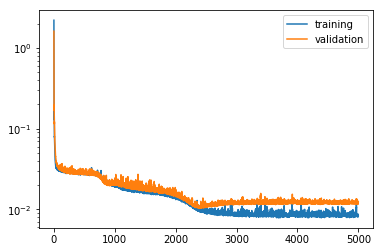

In [5]:
plt.plot(h.history['loss'], label='training')
plt.plot(h.history['val_loss'], label='validation')
plt.yscale('log')
plt.legend();

print(hidden1.get_weights()[0])
print(hidden1.get_weights()[1])

**e)** Plot the data points and the neural network output to see if the model was able to well approoximate the underlying function. If it is not the case then go back to **b)** and try to solve it.

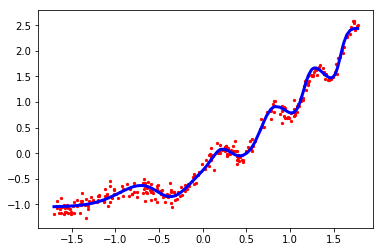

In [6]:
plt.scatter(X, Y, color='red', s=5)
plt.plot(sorted(X), model.predict(sorted(X)), color='b', linewidth=3)

## Exercise 2 (Binary classification)

Now will solve a binary classification task. The training data consists of data points $(x_i,y_i)$ with $x_i \in \mathcal{R}^2$ and $y_i \in \lbrace 0, 1\rbrace$. 

**a)** Generate the data using the methods `make_moons` or `make_circles` from the package `sklearn.datasets`. Plot the data points (blue for class 0 and red for class 1). Also split the data set into training and validation set.

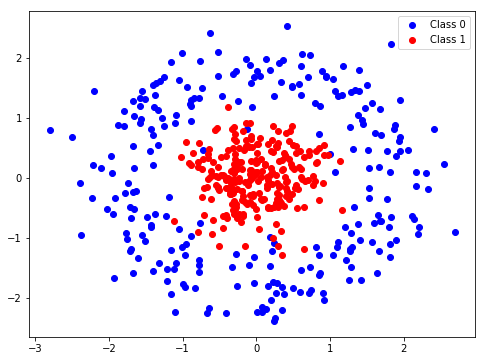

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

np.random.seed(10)

# X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X, Y = make_circles(noise=0.2, factor=0.2, random_state=0, n_samples=500)
X = scale(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='b', label='Class 0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
plt.legend();


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

**b)** Create a neural network using `binary_crossentropy` as loss function and `accuracy` as a metric to evaluate the results and train it using the training set.

In [147]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam

model = Sequential()
model.add(Dense(3, input_dim=2, activation='tanh')) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=adam(0.03), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [148]:
h = model.fit(X_train, Y_train, epochs=1000, verbose=1, validation_data=(X_test, Y_test))

Train on 250 samples, validate on 250 samples
Epoch 1/1000
250/250 [==============================] - 2s 9ms/step - loss: 0.7638 - acc: 0.5080 - val_loss: 0.6990 - val_acc: 0.5680
Epoch 2/1000
250/250 [==============================] - 0s 120us/step - loss: 0.6867 - acc: 0.5960 - val_loss: 0.6679 - val_acc: 0.6840
Epoch 3/1000
250/250 [==============================] - 0s 120us/step - loss: 0.6586 - acc: 0.7720 - val_loss: 0.6497 - val_acc: 0.8120
Epoch 4/1000
250/250 [==============================] - 0s 132us/step - loss: 0.6320 - acc: 0.7880 - val_loss: 0.6263 - val_acc: 0.8000
Epoch 5/1000
250/250 [==============================] - 0s 116us/step - loss: 0.6089 - acc: 0.8000 - val_loss: 0.6025 - val_acc: 0.8000
Epoch 6/1000
250/250 [==============================] - 0s 116us/step - loss: 0.5833 - acc: 0.8160 - val_loss: 0.5767 - val_acc: 0.8040
Epoch 7/1000
250/250 [==============================] - 0s 116us/step - loss: 0.5566 - acc: 0.8280 - val_loss: 0.5542 - val_acc: 0.7960
Epoc

250/250 [==============================] - 0s 212us/step - loss: 0.2847 - acc: 0.9240 - val_loss: 0.3024 - val_acc: 0.9120
Epoch 61/1000
250/250 [==============================] - 0s 108us/step - loss: 0.2722 - acc: 0.9280 - val_loss: 0.2924 - val_acc: 0.9360
Epoch 62/1000
250/250 [==============================] - 0s 108us/step - loss: 0.2611 - acc: 0.9400 - val_loss: 0.2814 - val_acc: 0.9280
Epoch 63/1000
250/250 [==============================] - 0s 120us/step - loss: 0.2508 - acc: 0.9560 - val_loss: 0.2695 - val_acc: 0.9400
Epoch 64/1000
250/250 [==============================] - 0s 120us/step - loss: 0.2386 - acc: 0.9600 - val_loss: 0.2582 - val_acc: 0.9360
Epoch 65/1000
250/250 [==============================] - 0s 120us/step - loss: 0.2215 - acc: 0.9680 - val_loss: 0.2441 - val_acc: 0.9520
Epoch 66/1000
250/250 [==============================] - 0s 104us/step - loss: 0.2090 - acc: 0.9800 - val_loss: 0.2313 - val_acc: 0.9600
Epoch 67/1000
250/250 [==============================] 

Epoch 120/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0962 - acc: 0.9760 - val_loss: 0.1230 - val_acc: 0.9640
Epoch 121/1000
250/250 [==============================] - 0s 140us/step - loss: 0.0968 - acc: 0.9760 - val_loss: 0.1239 - val_acc: 0.9640
Epoch 122/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0963 - acc: 0.9760 - val_loss: 0.1231 - val_acc: 0.9560
Epoch 123/1000
250/250 [==============================] - 0s 140us/step - loss: 0.0964 - acc: 0.9760 - val_loss: 0.1231 - val_acc: 0.9600
Epoch 124/1000
250/250 [==============================] - 0s 172us/step - loss: 0.0948 - acc: 0.9760 - val_loss: 0.1223 - val_acc: 0.9600
Epoch 125/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0956 - acc: 0.9760 - val_loss: 0.1230 - val_acc: 0.9640
Epoch 126/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0945 - acc: 0.9760 - val_loss: 0.1224 - val_acc: 0.9640
Epoch 127/1000
250/250 [==========

250/250 [==============================] - 0s 112us/step - loss: 0.0863 - acc: 0.9720 - val_loss: 0.1143 - val_acc: 0.9600
Epoch 180/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0871 - acc: 0.9720 - val_loss: 0.1141 - val_acc: 0.9560
Epoch 181/1000
250/250 [==============================] - 0s 284us/step - loss: 0.0849 - acc: 0.9760 - val_loss: 0.1159 - val_acc: 0.9640
Epoch 182/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0860 - acc: 0.9760 - val_loss: 0.1176 - val_acc: 0.9640
Epoch 183/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0843 - acc: 0.9760 - val_loss: 0.1155 - val_acc: 0.9640
Epoch 184/1000
250/250 [==============================] - 0s 116us/step - loss: 0.0853 - acc: 0.9760 - val_loss: 0.1136 - val_acc: 0.9600
Epoch 185/1000
250/250 [==============================] - 0s 116us/step - loss: 0.0845 - acc: 0.9760 - val_loss: 0.1138 - val_acc: 0.9640
Epoch 186/1000
250/250 [=========================

250/250 [==============================] - 0s 160us/step - loss: 0.0799 - acc: 0.9720 - val_loss: 0.1095 - val_acc: 0.9560
Epoch 239/1000
250/250 [==============================] - 0s 104us/step - loss: 0.0784 - acc: 0.9720 - val_loss: 0.1130 - val_acc: 0.9600
Epoch 240/1000
250/250 [==============================] - 0s 160us/step - loss: 0.0780 - acc: 0.9720 - val_loss: 0.1135 - val_acc: 0.9600
Epoch 241/1000
250/250 [==============================] - 0s 136us/step - loss: 0.0798 - acc: 0.9760 - val_loss: 0.1107 - val_acc: 0.9640
Epoch 242/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0777 - acc: 0.9720 - val_loss: 0.1091 - val_acc: 0.9600
Epoch 243/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0775 - acc: 0.9720 - val_loss: 0.1105 - val_acc: 0.9600
Epoch 244/1000
250/250 [==============================] - 0s 124us/step - loss: 0.0816 - acc: 0.9760 - val_loss: 0.1134 - val_acc: 0.9560
Epoch 245/1000
250/250 [=========================

250/250 [==============================] - 0s 124us/step - loss: 0.0745 - acc: 0.9760 - val_loss: 0.1093 - val_acc: 0.9520
Epoch 298/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0742 - acc: 0.9760 - val_loss: 0.1117 - val_acc: 0.9560
Epoch 299/1000
250/250 [==============================] - 0s 104us/step - loss: 0.0728 - acc: 0.9760 - val_loss: 0.1060 - val_acc: 0.9560
Epoch 300/1000
250/250 [==============================] - 0s 124us/step - loss: 0.0748 - acc: 0.9760 - val_loss: 0.1073 - val_acc: 0.9520
Epoch 301/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0721 - acc: 0.9720 - val_loss: 0.1090 - val_acc: 0.9560
Epoch 302/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0730 - acc: 0.9760 - val_loss: 0.1095 - val_acc: 0.9640
Epoch 303/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0725 - acc: 0.9720 - val_loss: 0.1088 - val_acc: 0.9520
Epoch 304/1000
250/250 [=========================

250/250 [==============================] - 0s 156us/step - loss: 0.0687 - acc: 0.9720 - val_loss: 0.1066 - val_acc: 0.9560
Epoch 357/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0702 - acc: 0.9720 - val_loss: 0.1125 - val_acc: 0.9600
Epoch 358/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0671 - acc: 0.9760 - val_loss: 0.1075 - val_acc: 0.9560
Epoch 359/1000
250/250 [==============================] - 0s 132us/step - loss: 0.0669 - acc: 0.9720 - val_loss: 0.1112 - val_acc: 0.9560
Epoch 360/1000
250/250 [==============================] - 0s 140us/step - loss: 0.0676 - acc: 0.9720 - val_loss: 0.1124 - val_acc: 0.9600
Epoch 361/1000
250/250 [==============================] - 0s 136us/step - loss: 0.0679 - acc: 0.9720 - val_loss: 0.1096 - val_acc: 0.9560
Epoch 362/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0669 - acc: 0.9760 - val_loss: 0.1079 - val_acc: 0.9600
Epoch 363/1000
250/250 [=========================

250/250 [==============================] - 0s 120us/step - loss: 0.0647 - acc: 0.9720 - val_loss: 0.1087 - val_acc: 0.9560
Epoch 416/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0641 - acc: 0.9720 - val_loss: 0.1097 - val_acc: 0.9560
Epoch 417/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0629 - acc: 0.9720 - val_loss: 0.1068 - val_acc: 0.9600
Epoch 418/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0638 - acc: 0.9720 - val_loss: 0.1146 - val_acc: 0.9560
Epoch 419/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0634 - acc: 0.9720 - val_loss: 0.1143 - val_acc: 0.9560
Epoch 420/1000
250/250 [==============================] - 0s 116us/step - loss: 0.0632 - acc: 0.9720 - val_loss: 0.1090 - val_acc: 0.9600
Epoch 421/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0645 - acc: 0.9720 - val_loss: 0.1082 - val_acc: 0.9520
Epoch 422/1000
250/250 [=========================

250/250 [==============================] - 0s 124us/step - loss: 0.0614 - acc: 0.9720 - val_loss: 0.1075 - val_acc: 0.9640
Epoch 475/1000
250/250 [==============================] - 0s 144us/step - loss: 0.0622 - acc: 0.9760 - val_loss: 0.1103 - val_acc: 0.9600
Epoch 476/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0629 - acc: 0.9720 - val_loss: 0.1221 - val_acc: 0.9600
Epoch 477/1000
250/250 [==============================] - 0s 148us/step - loss: 0.0612 - acc: 0.9720 - val_loss: 0.1107 - val_acc: 0.9640
Epoch 478/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0626 - acc: 0.9720 - val_loss: 0.1069 - val_acc: 0.9600
Epoch 479/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0603 - acc: 0.9760 - val_loss: 0.1105 - val_acc: 0.9600
Epoch 480/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0632 - acc: 0.9720 - val_loss: 0.1193 - val_acc: 0.9520
Epoch 481/1000
250/250 [=========================

250/250 [==============================] - 0s 128us/step - loss: 0.0581 - acc: 0.9720 - val_loss: 0.1153 - val_acc: 0.9560
Epoch 534/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0621 - acc: 0.9720 - val_loss: 0.1113 - val_acc: 0.9640
Epoch 535/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0681 - acc: 0.9720 - val_loss: 0.1205 - val_acc: 0.9560
Epoch 536/1000
250/250 [==============================] - 0s 136us/step - loss: 0.0566 - acc: 0.9720 - val_loss: 0.1114 - val_acc: 0.9680
Epoch 537/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0600 - acc: 0.9720 - val_loss: 0.1118 - val_acc: 0.9680
Epoch 538/1000
250/250 [==============================] - 0s 100us/step - loss: 0.0598 - acc: 0.9720 - val_loss: 0.1159 - val_acc: 0.9560
Epoch 539/1000
250/250 [==============================] - 0s 136us/step - loss: 0.0589 - acc: 0.9720 - val_loss: 0.1109 - val_acc: 0.9600
Epoch 540/1000
250/250 [=========================

250/250 [==============================] - 0s 124us/step - loss: 0.0552 - acc: 0.9760 - val_loss: 0.1136 - val_acc: 0.9640
Epoch 593/1000
250/250 [==============================] - 0s 104us/step - loss: 0.0592 - acc: 0.9720 - val_loss: 0.1118 - val_acc: 0.9640
Epoch 594/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0577 - acc: 0.9680 - val_loss: 0.1189 - val_acc: 0.9600
Epoch 595/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0568 - acc: 0.9760 - val_loss: 0.1199 - val_acc: 0.9640
Epoch 596/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0547 - acc: 0.9760 - val_loss: 0.1150 - val_acc: 0.9640
Epoch 597/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0561 - acc: 0.9720 - val_loss: 0.1179 - val_acc: 0.9600
Epoch 598/1000
250/250 [==============================] - 0s 124us/step - loss: 0.0579 - acc: 0.9720 - val_loss: 0.1193 - val_acc: 0.9640
Epoch 599/1000
250/250 [=========================

250/250 [==============================] - 0s 112us/step - loss: 0.0532 - acc: 0.9760 - val_loss: 0.1198 - val_acc: 0.9640
Epoch 652/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0514 - acc: 0.9760 - val_loss: 0.1184 - val_acc: 0.9640
Epoch 653/1000
250/250 [==============================] - 0s 104us/step - loss: 0.0564 - acc: 0.9720 - val_loss: 0.1181 - val_acc: 0.9640
Epoch 654/1000
250/250 [==============================] - 0s 124us/step - loss: 0.0669 - acc: 0.9640 - val_loss: 0.1292 - val_acc: 0.9600
Epoch 655/1000
250/250 [==============================] - 0s 116us/step - loss: 0.0472 - acc: 0.9800 - val_loss: 0.1203 - val_acc: 0.9640
Epoch 656/1000
250/250 [==============================] - 0s 148us/step - loss: 0.0637 - acc: 0.9800 - val_loss: 0.1190 - val_acc: 0.9600
Epoch 657/1000
250/250 [==============================] - 0s 116us/step - loss: 0.0572 - acc: 0.9720 - val_loss: 0.1249 - val_acc: 0.9600
Epoch 658/1000
250/250 [=========================

250/250 [==============================] - 0s 104us/step - loss: 0.0544 - acc: 0.9800 - val_loss: 0.1286 - val_acc: 0.9520
Epoch 711/1000
250/250 [==============================] - 0s 136us/step - loss: 0.0504 - acc: 0.9720 - val_loss: 0.1240 - val_acc: 0.9560
Epoch 712/1000
250/250 [==============================] - 0s 104us/step - loss: 0.0502 - acc: 0.9680 - val_loss: 0.1235 - val_acc: 0.9600
Epoch 713/1000
250/250 [==============================] - 0s 132us/step - loss: 0.0528 - acc: 0.9720 - val_loss: 0.1268 - val_acc: 0.9600
Epoch 714/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0495 - acc: 0.9800 - val_loss: 0.1250 - val_acc: 0.9560
Epoch 715/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0538 - acc: 0.9680 - val_loss: 0.1266 - val_acc: 0.9560
Epoch 716/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0509 - acc: 0.9800 - val_loss: 0.1265 - val_acc: 0.9600
Epoch 717/1000
250/250 [=========================

250/250 [==============================] - 0s 108us/step - loss: 0.0514 - acc: 0.9680 - val_loss: 0.1274 - val_acc: 0.9520
Epoch 770/1000
250/250 [==============================] - 0s 116us/step - loss: 0.0489 - acc: 0.9680 - val_loss: 0.1274 - val_acc: 0.9600
Epoch 771/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0522 - acc: 0.9760 - val_loss: 0.1319 - val_acc: 0.9520
Epoch 772/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0495 - acc: 0.9760 - val_loss: 0.1300 - val_acc: 0.9520
Epoch 773/1000
250/250 [==============================] - 0s 140us/step - loss: 0.0503 - acc: 0.9680 - val_loss: 0.1291 - val_acc: 0.9560
Epoch 774/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0501 - acc: 0.9760 - val_loss: 0.1276 - val_acc: 0.9600
Epoch 775/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0512 - acc: 0.9720 - val_loss: 0.1300 - val_acc: 0.9520
Epoch 776/1000
250/250 [=========================

250/250 [==============================] - 0s 116us/step - loss: 0.0489 - acc: 0.9800 - val_loss: 0.1325 - val_acc: 0.9480
Epoch 829/1000
250/250 [==============================] - 0s 136us/step - loss: 0.0514 - acc: 0.9680 - val_loss: 0.1294 - val_acc: 0.9560
Epoch 830/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0494 - acc: 0.9680 - val_loss: 0.1279 - val_acc: 0.9600
Epoch 831/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0500 - acc: 0.9760 - val_loss: 0.1299 - val_acc: 0.9560
Epoch 832/1000
250/250 [==============================] - 0s 156us/step - loss: 0.0491 - acc: 0.9800 - val_loss: 0.1304 - val_acc: 0.9520
Epoch 833/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0489 - acc: 0.9800 - val_loss: 0.1331 - val_acc: 0.9480
Epoch 834/1000
250/250 [==============================] - 0s 124us/step - loss: 0.0526 - acc: 0.9720 - val_loss: 0.1277 - val_acc: 0.9520
Epoch 835/1000
250/250 [=========================

250/250 [==============================] - 0s 104us/step - loss: 0.0476 - acc: 0.9720 - val_loss: 0.1305 - val_acc: 0.9560
Epoch 888/1000
250/250 [==============================] - 0s 104us/step - loss: 0.0500 - acc: 0.9760 - val_loss: 0.1297 - val_acc: 0.9520
Epoch 889/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0465 - acc: 0.9760 - val_loss: 0.1299 - val_acc: 0.9560
Epoch 890/1000
250/250 [==============================] - 0s 128us/step - loss: 0.0477 - acc: 0.9760 - val_loss: 0.1308 - val_acc: 0.9520
Epoch 891/1000
250/250 [==============================] - 0s 160us/step - loss: 0.0472 - acc: 0.9760 - val_loss: 0.1329 - val_acc: 0.9480
Epoch 892/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0477 - acc: 0.9760 - val_loss: 0.1305 - val_acc: 0.9600
Epoch 893/1000
250/250 [==============================] - 0s 100us/step - loss: 0.0479 - acc: 0.9760 - val_loss: 0.1358 - val_acc: 0.9560
Epoch 894/1000
250/250 [=========================

250/250 [==============================] - 0s 112us/step - loss: 0.0475 - acc: 0.9760 - val_loss: 0.1309 - val_acc: 0.9560
Epoch 947/1000
250/250 [==============================] - 0s 156us/step - loss: 0.0469 - acc: 0.9760 - val_loss: 0.1329 - val_acc: 0.9440
Epoch 948/1000
250/250 [==============================] - 0s 108us/step - loss: 0.0487 - acc: 0.9760 - val_loss: 0.1334 - val_acc: 0.9440
Epoch 949/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0513 - acc: 0.9760 - val_loss: 0.1351 - val_acc: 0.9520
Epoch 950/1000
250/250 [==============================] - 0s 124us/step - loss: 0.0486 - acc: 0.9800 - val_loss: 0.1306 - val_acc: 0.9520
Epoch 951/1000
250/250 [==============================] - 0s 112us/step - loss: 0.0480 - acc: 0.9760 - val_loss: 0.1348 - val_acc: 0.9480
Epoch 952/1000
250/250 [==============================] - 0s 120us/step - loss: 0.0474 - acc: 0.9800 - val_loss: 0.1354 - val_acc: 0.9480
Epoch 953/1000
250/250 [=========================

**d)** Plot the training and validation error curves.

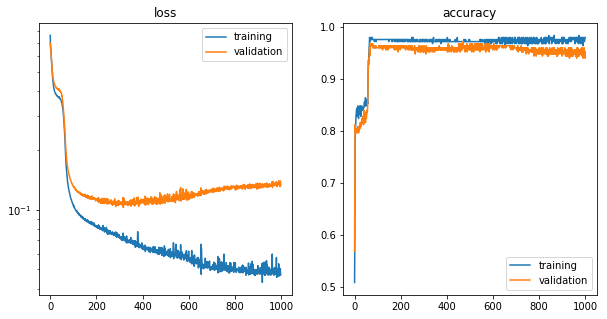

In [150]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('loss')
plt.plot(h.history['loss'], label='training')
plt.plot(h.history['val_loss'], label='validation')
plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(h.history['acc'], label='training')
plt.plot(h.history['val_acc'], label='validation')
plt.legend()

**e)** Plot the data points and color the surface according to the probability of belonging to each class. This should make visible the decision area and its uncertainty.

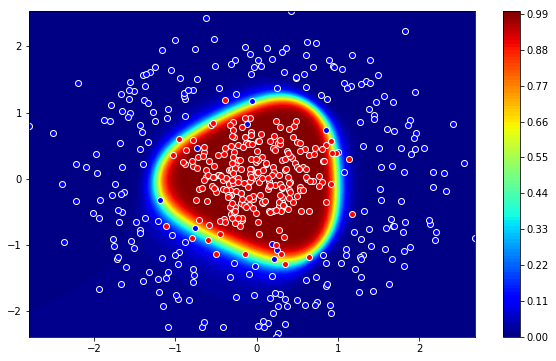

In [155]:
import numpy as np

# create grid
x = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx, yy = np.meshgrid(x, y, indexing='ij')
grid = np.stack((xx, yy), axis=-1).reshape(-1, 2)

# evaluate model in the whole grid
prediction = model.predict(grid)

plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, prediction.reshape(100, 100), cmap='jet', levels=100)
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='b', label='Class 0', edgecolors='white')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1', edgecolors='white')

plt.xlim([X[:,0].min(), X[:,0].max()])
plt.ylim([X[:,1].min(), X[:,1].max()])
plt.colorbar(contour)